In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
 # Replace the path with the correct path for your data.
y2015 = pd.read_csv(
    'https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/LoanStats3d.csv',
    skipinitialspace=True,
    header=1
)


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,19,55) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
categorical = y2015.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print(i)
    print(column.nunique())

id
421097
term
2
int_rate
110
grade
7
sub_grade
35
emp_title
120812
emp_length
11
home_ownership
4
verification_status
3
issue_d
12
loan_status
7
pymnt_plan
1
url
421095
desc
34
purpose
14
title
27
zip_code
914
addr_state
49
earliest_cr_line
668
revol_util
1211
initial_list_status
2
last_pymnt_d
25
next_pymnt_d
4
last_credit_pull_d
26
application_type
2
verification_status_joint
3


In [0]:
# Convert ID and Interest Rate to numeric.
y2015['id'] = pd.to_numeric(y2015['id'], errors='coerce')
y2015['int_rate'] = pd.to_numeric(y2015['int_rate'].str.strip('%'), errors='coerce')

# Drop other columns with many unique variables
y2015.drop(['url', 'emp_title', 'zip_code', 'earliest_cr_line', 'revol_util',
            'sub_grade', 'addr_state', 'desc'], 1, inplace=True)

In [0]:
# Remove two summary rows at the end that don't actually contain data.
y2015 = y2015[:-2]

In [7]:
pd.get_dummies(y2015)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,...,last_pymnt_d_Nov-2016,last_pymnt_d_Oct-2015,last_pymnt_d_Oct-2016,last_pymnt_d_Sep-2015,last_pymnt_d_Sep-2016,next_pymnt_d_Feb-2017,next_pymnt_d_Jan-2017,next_pymnt_d_Jul-2016,next_pymnt_d_Mar-2017,last_credit_pull_d_Apr-2015,last_credit_pull_d_Apr-2016,last_credit_pull_d_Aug-2015,last_credit_pull_d_Aug-2016,last_credit_pull_d_Dec-2014,last_credit_pull_d_Dec-2015,last_credit_pull_d_Dec-2016,last_credit_pull_d_Feb-2015,last_credit_pull_d_Feb-2016,last_credit_pull_d_Jan-2015,last_credit_pull_d_Jan-2016,last_credit_pull_d_Jan-2017,last_credit_pull_d_Jul-2015,last_credit_pull_d_Jul-2016,last_credit_pull_d_Jun-2015,last_credit_pull_d_Jun-2016,last_credit_pull_d_Mar-2015,last_credit_pull_d_Mar-2016,last_credit_pull_d_May-2015,last_credit_pull_d_May-2016,last_credit_pull_d_Nov-2015,last_credit_pull_d_Nov-2016,last_credit_pull_d_Oct-2015,last_credit_pull_d_Oct-2016,last_credit_pull_d_Sep-2015,last_credit_pull_d_Sep-2016,application_type_INDIVIDUAL,application_type_JOINT,verification_status_joint_Not Verified,verification_status_joint_Source Verified,verification_status_joint_Verified
0,68009401.0,72868139.0,16000.0,16000.0,16000.0,14.85,379.39,48000.0,33.18,0.0,0.0,33.0,2.0,11.0,2.0,19108.0,19.0,13668.88,13668.88,4519.68,4519.68,2331.12,2188.56,0.0,0.00,0.0000,379.39,0.0,33.0,1.0,NaN,NaN,0.0,0.0,31329.0,1.0,2.0,1.0,2.0,6.0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,68354783.0,73244544.0,9600.0,9600.0,9600.0,7.49,298.58,60000.0,22.44,0.0,0.0,NaN,NaN,7.0,0.0,7722.0,9.0,6635.69,6635.69,3572.97,3572.97,2964.31,608.66,0.0,0.00,0.0000,298.58,0.0,NaN,1.0,NaN,NaN,0.0,0.0,55387.0,0.0,3.0,0.0,0.0,47.0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,68466916.0,73356753.0,25000.0,25000.0,25000.0,7.49,777.55,109000.0,26.02,0.0,1.0,NaN,NaN,9.0,0.0,20862.0,19.0,0.00,0.00,26224.23,26224.23,25000.00,1224.23,0.0,0.00,0.0000,20807.39,0.0,NaN,1.0,NaN,NaN,0.0,0.0,305781.0,0.0,3.0,0.0,1.0,13.0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,68466961.0,73356799.0,28000.0,28000.0,28000.0,6.49,858.05,92000.0,21.60,0.0,0.0,42.0,NaN,16.0,0.0,51507.0,24.0,19263.77,19263.77,10271.36,10271.36,8736.23,1535.13,0.0,0.00,0.0000,858.05,0.0,NaN,1.0,NaN,NaN,0.0,0.0,221110.0,0.0,2.0,0.0,0.0,27.0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,68495092.0,73384866.0,8650.0,8650.0,8650.0,19.89,320.99,55000.0,25.49,0.0,4.0,NaN,30.0,18.0,1.0,9568.0,19.0,0.00,0.00,9190.49,9190.49,8650.00,540.49,0.0,0.00,0.0000,8251.42,0.0,NaN,1.0,NaN,NaN,0.0,0.0,18926.0,6.0,1.0,0.0,1.0,19.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421090,36371250.0,39102635.0,10000.0,10000.0,10000.0,11.99,332.10,31000.0,28.69,0.0,0.0,NaN,77.0,9.0,1.0,14037.0,15.0,3737.83,3737.83,7962.24,7962.24,6262.17,1700.07,0.0,0.00,0.0000,332.10,0.0,NaN,1.0,NaN,NaN,0.0,0.0,25274.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
421091,36441262.0,39152692.0,24000.0,24000.0,24000.0,11.99,797.03,79000.0,3.90,0.

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn import ensemble
from sklearn.model_selection import cross_val_score

# rfc = ensemble.RandomForestClassifier()
X = y2015.drop('loan_status', 1)
Y = y2015['loan_status']
X = pd.get_dummies(X)
X = X.dropna(axis=1)
X.corr()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,num_accts_ever_120_pd,...,last_pymnt_d_Nov-2016,last_pymnt_d_Oct-2015,last_pymnt_d_Oct-2016,last_pymnt_d_Sep-2015,last_pymnt_d_Sep-2016,next_pymnt_d_Feb-2017,next_pymnt_d_Jan-2017,next_pymnt_d_Jul-2016,next_pymnt_d_Mar-2017,last_credit_pull_d_Apr-2015,last_credit_pull_d_Apr-2016,last_credit_pull_d_Aug-2015,last_credit_pull_d_Aug-2016,last_credit_pull_d_Dec-2014,last_credit_pull_d_Dec-2015,last_credit_pull_d_Dec-2016,last_credit_pull_d_Feb-2015,last_credit_pull_d_Feb-2016,last_credit_pull_d_Jan-2015,last_credit_pull_d_Jan-2016,last_credit_pull_d_Jan-2017,last_credit_pull_d_Jul-2015,last_credit_pull_d_Jul-2016,last_credit_pull_d_Jun-2015,last_credit_pull_d_Jun-2016,last_credit_pull_d_Mar-2015,last_credit_pull_d_Mar-2016,last_credit_pull_d_May-2015,last_credit_pull_d_May-2016,last_credit_pull_d_Nov-2015,last_credit_pull_d_Nov-2016,last_credit_pull_d_Oct-2015,last_credit_pull_d_Oct-2016,last_credit_pull_d_Sep-2015,last_credit_pull_d_Sep-2016,application_type_INDIVIDUAL,application_type_JOINT,verification_status_joint_Not Verified,verification_status_joint_Source Verified,verification_status_joint_Verified
id,1.000000,0.997540,-0.008288,-0.008288,-0.008554,-0.053402,-0.012919,0.015055,0.005692,0.002300,0.000660,0.006309,0.003501,0.003774,-0.014479,0.192187,0.192058,-0.219883,-0.220078,-0.188353,-0.165885,-0.015779,-0.070027,-0.070594,-0.068844,0.011953,NaN,-0.004834,0.002312,0.011241,0.019249,0.015502,0.007556,0.001075,0.001961,0.004593,0.009478,-0.005305,-0.013036,-0.006172,...,0.004712,-0.065443,-0.000998,-0.069138,-0.000334,0.093798,0.082136,-0.002499,0.001213,-0.031806,-0.015322,-0.028265,-0.006357,-0.005740,-0.022282,-0.004914,-0.023048,-0.017332,-0.017500,-0.018747,0.099275,-0.035936,-0.007953,-0.035695,-0.008589,-0.028315,-0.019105,-0.032937,-0.012390,-0.020463,-0.008433,-0.027861,-0.066300,-0.034040,-0.011424,-0.042871,0.042871,0.031699,0.015205,0.024511
member_id,0.997540,1.000000,-0.008620,-0.008620,-0.008885,-0.053447,-0.013274,0.014958,0.005806,0.002261,0.000715,0.006111,0.003635,0.003745,-0.014673,0.191883,0.191755,-0.219945,-0.220139,-0.188443,-0.165861,-0.015748,-0.069799,-0.070372,-0.068974,0.011891,NaN,-0.004732,0.002329,0.010903,0.019148,0.015281,0.007317,0.000655,0.001977,0.004731,0.009476,-0.005469,-0.013261,-0.006180,...,0.004561,-0.065593,-0.000917,-0.069057,-0.000225,0.093505,0.082226,-0.002471,0.001217,-0.031542,-0.015245,-0.028232,-0.006303,-0.006694,-0.022267,-0.004969,-0.022810,-0.017434,-0.017318,-0.018649,0.099011,-0.035765,-0.008028,-0.035466,-0.008576,-0.028042,-0.019086,-0.032688,-0.012458,-0.020420,-0.008466,-0.027835,-0.066006,-0.033964,-0.011364,-0.043300,0.043300,0.032002,0.015380,0.024761
loan_amnt,-0.008288,-0.008620,1.000000,1.000000,0.999994,0.140572,0.941205,0.305734,0.006103,-0.010424,-0.039040,0.188214,-0.088899,0.334656,0.208430,0.623926,0.623961,0.706184,0.706157,0.556266,0.736585,0.051888,0.077870,0.079190,0.259864,-0.027454,NaN,0.000645,-0.021437,0.325352,0.330877,-0.010114,0.238156,-0.005382,-0.002096,0.183754,0.066548,0.041686,0.231574,-0.057356,...,-0.001097,-0.007195,-0.000713,-0.008996,-0.000223,0.017513,0.006620,-0.000223,0.005244,0.000313,0.001192,0.003148,-0.000628,0.000024,0.005560,0.004312,-0.001841,-0.003179,-0.002078,0.002012,-0.011535,0.001357,0.001670,-0.000367,0.003953,0.004806,0.002152,0.000319,0.002048,0.002522,0.003849,-0.000398,0.009984,0.000568,-0.004610,-0.016880,0.016880,0.008359,0.007089,0.014350
funded_amnt,-0.008288,-0.008620,1.000000

In [0]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])


In [10]:
finalDf = pd.concat([principalDf,Y], axis = 1)
finalDf

,principal component 1,principal component 2,loan_status
0,-2.077084e+07,-145783.985522,Current
1,-2.128161e+07,-150995.630642,Current
2,-2.144025e+07,-144556.743642,Fully Paid
3,-2.144029e+07,-144882.505233,Current
4,-2.147992e+07,-144545.567142,Fully Paid
...,...,...,...
421090,2.550103e+07,-198186.329055,Current
421091,2.541662e+07,-180725.718036,Current
421092,2.565684e+07,-189226.390081,Charged Off
421093,2.533174e+07,-192520.093164,Charged Off


In [11]:
np.unique(Y)

array(['Charged Off', 'Current', 'Default', 'Fully Paid',
       'In Grace Period', 'Late (16-30 days)', 'Late (31-120 days)'],
      dtype=object)

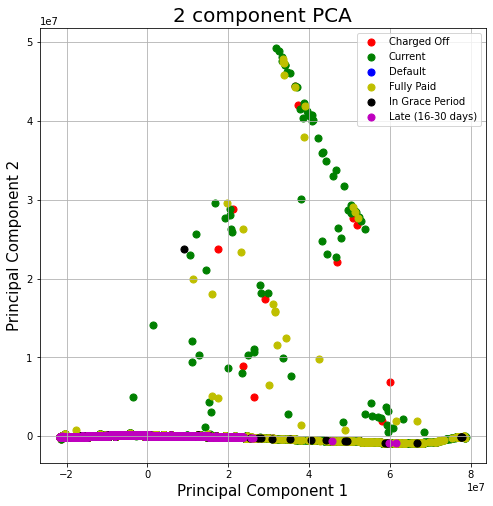

In [12]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = np.unique(Y).tolist()
colors = ['r', 'g', 'b', 'y', 'k', 'm']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['loan_status'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [0]:
X_cm = X.corr()

In [17]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(X_cm, 40))

Top Absolute Correlations
initial_list_status_f        initial_list_status_w            1.000000
term_ 36 months              term_ 60 months                  1.000000
loan_amnt                    funded_amnt                      1.000000
application_type_INDIVIDUAL  application_type_JOINT           1.000000
purpose_educational          title_Learning and training      1.000000
out_prncp                    out_prncp_inv                    1.000000
total_pymnt                  total_pymnt_inv                  1.000000
funded_amnt                  funded_amnt_inv                  1.000000
loan_amnt                    funded_amnt_inv                  1.000000
purpose_moving               title_Moving and relocation      0.999998
purpose_vacation             title_Vacation                   0.999998
purpose_major_purchase       title_Major purchase             0.999996
purpose_credit_card          title_Credit card refinancing    0.999993
purpose_house                title_Home buying     